In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
#设置黑体为默认字体
plt.rcParams["font.sans-serif"] = "SimHei"
#设置正常显示负号
plt.rcParams["axes.unicode_minus"] = False
# 使用pandas读取文件，处理数据
bank=pd.read_excel("data//bank.xlsx")
bank

,日期,开盘价,最高价,最低价,收盘价,涨跌额,涨跌幅(%),成交量(手),成交金额(万元),振幅(%),换手率(%)
0,2021-12-29,4.66,4.67,4.64,4.66,-0.02,-0.43,"976,647","45,452",0.64,0.04
1,2021-12-28,4.66,4.68,4.65,4.68,0.02,0.43,"2,005,505","93,609",0.64,0.07
2,2021-12-27,4.64,4.66,4.64,4.66,0.01,0.22,"905,033","42,110",0.43,0.03
3,2021-12-24,4.65,4.67,4.64,4.65,0.00,0.00,"1,279,088","59,517",0.65,0.05
4,2021-12-23,4.64,4.65,4.63,4.65,0.01,0.22,"980,910","45,545",0.43,0.04
...,...,...,...,...,...,...,...,...,...,...,...
3666,2006-11-02,3.30,3.30,3.25,3.28,-0.02,-0.61,"1,751,554","57,340",1.52,3.59
3667,2006-11-01,3.30,3.31,3.28,3.30,0.00,0.00,"1,328,924","43,726",0.91,2.72
3668,2006-10-31,3.28,3.33,3.28,3.30,0.01,0.30,"2,301,262","76,105",1.52,4.71
3669,2006-10-30,3.27,3.32,3.25,3.29,0.01,0.30,"3,519,210","115,313",2.13,7.21


In [3]:
bank.sort_values(by="日期",inplace=True)
bank.to_csv("data//bank.csv")
data=pd.read_csv("data//bank.csv")
data

,Unnamed: 0,日期,开盘价,最高价,最低价,收盘价,涨跌额,涨跌幅(%),成交量(手),成交金额(万元),振幅(%),换手率(%)
0,3670,2006-10-27,3.40,3.44,3.26,3.28,0.16,5.13,"25,825,396","872,531",5.77,52.91
1,3669,2006-10-30,3.27,3.32,3.25,3.29,0.01,0.30,"3,519,210","115,313",2.13,7.21
2,3668,2006-10-31,3.28,3.33,3.28,3.30,0.01,0.30,"2,301,262","76,105",1.52,4.71
3,3667,2006-11-01,3.30,3.31,3.28,3.30,0.00,0.00,"1,328,924","43,726",0.91,2.72
4,3666,2006-11-02,3.30,3.30,3.25,3.28,-0.02,-0.61,"1,751,554","57,340",1.52,3.59
...,...,...,...,...,...,...,...,...,...,...,...,...
3666,4,2021-12-23,4.64,4.65,4.63,4.65,0.01,0.22,"980,910","45,545",0.43,0.04
3667,3,2021-12-24,4.65,4.67,4.64,4.65,0.00,0.00,"1,279,088","59,517",0.65,0.05
3668,2,2021-12-27,4.64,4.66,4.64,4.66,0.01,0.22,"905,033","42,110",0.43,0.03
3669,1,2021-12-28,4.66,4.68,4.65,4.68,0.02,0.43,"2,005,505","93,609",0.64,0.07


In [4]:
data.head()

,Unnamed: 0,日期,开盘价,最高价,最低价,收盘价,涨跌额,涨跌幅(%),成交量(手),成交金额(万元),振幅(%),换手率(%)
0,3670,2006-10-27,3.40,3.44,3.26,3.28,0.16,5.13,"25,825,396","872,531",5.77,52.91
1,3669,2006-10-30,3.27,3.32,3.25,3.29,0.01,0.30,"3,519,210","115,313",2.13,7.21
2,3668,2006-10-31,3.28,3.33,3.28,3.30,0.01,0.30,"2,301,262","76,105",1.52,4.71
3,3667,2006-11-01,3.30,3.31,3.28,3.30,0.00,0.00,"1,328,924","43,726",0.91,2.72
4,3666,2006-11-02,3.30,3.30,3.25,3.28,-0.02,-0.61,"1,751,554","57,340",1.52,3.59


In [5]:
data.describe()

,Unnamed: 0,开盘价,最高价,最低价,收盘价,涨跌额,涨跌幅(%),振幅(%),换手率(%)
count,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000
mean,1835.000000,4.830746,4.885159,4.781041,4.836707,0.001288,0.042988,2.078630,0.565434
std,1059.870747,0.908627,0.930808,0.886102,0.908532,0.086844,1.648760,1.596886,1.729437
min,0.000000,3.220000,3.230000,3.130000,3.230000,-0.650000,-10.000000,0.000000,0.000000
25%,917.500000,4.190000,4.230000,4.160000,4.190000,-0.030000,-0.700000,1.050000,0.030000
50%,1835.000000,4.680000,4.730000,4.640000,4.690000,0.000000,0.000000,1.590000,0.060000
75%,2752.500000,5.380000,5.440000,5.320000,5.390000,0.030000,0.670000,2.560000,0.170000
max,3670.000000,8.880000,9.000000,8.600000,8.840000,0.660000,10.050000,14.680000,52.910000


In [6]:
# 前3000天的收盘价作为训练集
training_set = data.iloc[0:3000, 5:6].values  
# 后面天数的收盘价作为测试集
test_set = data.iloc[3000:, 5:6].values 

In [7]:
training_set

array([[3.28],
       [3.29],
       [3.3 ],
       ...,
       [5.45],
       [5.51],
       [5.45]])

In [8]:
test_set

array([[5.57],
       [5.64],
       [5.66],
       [5.7 ],
       [5.81],
       [5.82],
       [5.78],
       [5.75],
       [5.73],
       [5.73],
       [5.81],
       [6.  ],
       [6.01],
       [5.94],
       [5.98],
       [5.83],
       [5.81],
       [5.81],
       [5.73],
       [5.71],
       [5.8 ],
       [5.81],
       [5.72],
       [5.66],
       [5.59],
       [5.52],
       [5.61],
       [5.54],
       [5.52],
       [5.57],
       [5.59],
       [5.57],
       [5.61],
       [5.64],
       [5.65],
       [5.65],
       [5.7 ],
       [5.65],
       [5.67],
       [5.65],
       [5.67],
       [5.61],
       [5.7 ],
       [5.73],
       [5.76],
       [5.73],
       [5.78],
       [5.79],
       [5.76],
       [5.73],
       [5.74],
       [5.74],
       [5.74],
       [5.78],
       [5.84],
       [5.85],
       [5.88],
       [5.83],
       [5.85],
       [5.91],
       [5.89],
       [5.92],
       [5.93],
       [5.67],
       [5.68],
       [5.67],
       [5.

In [9]:
#归一化到(0，1)之间
sc = MinMaxScaler(feature_range=(0, 1))
#求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
training_set = sc.fit_transform(training_set)
#利用训练集的属性对测试集进行归一化
test_set = sc.transform(test_set)
# len(test_set)

In [10]:
x_train = []
y_train = []
x_test = []
y_test = []
#利用for循环，遍历整个训练集，提取训练集中连续60天的收盘价作为输入特征x_train，
#第61天的数据作为标签。0的是第一天,60是第61天
for i in range(60, len(training_set)):
    x_train.append(training_set[i - 60:i, 0])
    y_train.append(training_set[i, 0])

In [11]:
#对训练集进行打乱
np.random.seed(1)
np.random.shuffle(x_train)
np.random.seed(1)
np.random.shuffle(y_train)
tf.random.set_seed(1)

In [12]:
#将训练集由list格式变为array格式
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))
x_train

array([[[0.19964349],
        [0.20320856],
        [0.20677362],
        ...,
        [0.20142602],
        [0.20320856],
        [0.19607843]],

       [[0.75757576],
        [0.79322638],
        [0.77896613],
        ...,
        [0.48484848],
        [0.47771836],
        [0.48484848]],

       [[0.69518717],
        [0.69340463],
        [0.70231729],
        ...,
        [0.47237077],
        [0.47950089],
        [0.47950089]],

       ...,

       [[0.21033868],
        [0.20677362],
        [0.23707665],
        ...,
        [0.16934046],
        [0.16934046],
        [0.16042781]],

       [[0.78074866],
        [0.75222816],
        [0.82531194],
        ...,
        [0.90196078],
        [0.87165775],
        [0.8342246 ]],

       [[0.24064171],
        [0.23885918],
        [0.23529412],
        ...,
        [0.21925134],
        [0.21925134],
        [0.20499109]]])

In [13]:
#利用for循环，遍历整个测试集，提取测试集中连续60天的开盘价作为输入特征x_test，
#第61天的数据作为标签，
for i in range(60, len(test_set)):
    x_test.append(test_set[i - 60:i, 0])
    y_test.append(test_set[i, 0])
print(len(y_test))

611


In [14]:
#测试集变array并reshape为符合RNN输入要求：[送入样本数，循环核时间展开步数，每个时间步输入特征个数]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], 60, 1))

In [15]:
model = tf.keras.Sequential([
    SimpleRNN(60, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(60),
    Dropout(0.2),
    Dense(1)
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mse",metrics="accuracy")

In [17]:
fit_result = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), validation_freq=1)

Epoch 1/10
46/46 [==============================] - 2s 17ms/step - loss: 0.1047 - accuracy: 0.0010 - val_loss: 6.1398e-04 - val_accuracy: 0.0000e+00
Epoch 2/10
46/46 [==============================] - 0s 10ms/step - loss: 0.0204 - accuracy: 0.0010 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 3/10
46/46 [==============================] - 1s 17ms/step - loss: 0.0148 - accuracy: 0.0010 - val_loss: 3.2296e-04 - val_accuracy: 0.0000e+00
Epoch 4/10
46/46 [==============================] - 1s 20ms/step - loss: 0.0103 - accuracy: 0.0010 - val_loss: 2.7459e-04 - val_accuracy: 0.0000e+00
Epoch 5/10
46/46 [==============================] - 2s 34ms/step - loss: 0.0091 - accuracy: 6.8027e-04 - val_loss: 2.3927e-04 - val_accuracy: 0.0000e+00
Epoch 6/10
46/46 [==============================] - 2s 34ms/step - loss: 0.0068 - accuracy: 0.0010 - val_loss: 3.2688e-04 - val_accuracy: 0.0000e+00
Epoch 7/10
46/46 [==============================] - 1s 14ms/step - loss: 0.0063 - accuracy: 0.0010 - val_l

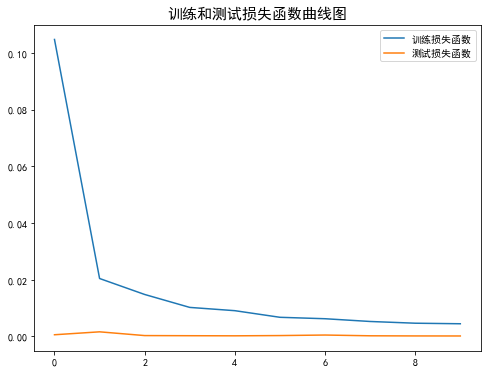

In [18]:
loss = fit_result.history["loss"]
val_loss = fit_result.history["val_loss"]
plt.figure(figsize=(8, 6))
plt.plot(loss, label="训练损失函数")
plt.plot(val_loss, label="测试损失函数")
plt.title("训练和测试损失函数曲线图", fontsize=15)
plt.legend()
plt.show()

In [19]:
# 测试集输入模型进行预测
pred = model.predict(x_test)
# 反归一化
pred = sc.inverse_transform(pred)
real = sc.inverse_transform(test_set[60:])

correct, number = 0, len(pred)
#print(len(real))
for i in range(number):
    if (tf.equal(pred[i], real[i])):
        correct = correct + 1
print("预测准确率为：%.3f" % (correct / number))

预测准确率为：0.000


In [20]:
pred

array([[5.879583 ],
       [5.8903227],
       [5.8786597],
       [5.8973546],
       [5.820895 ],
       [5.702068 ],
       [5.646089 ],
       [5.5907454],
       [5.5690165],
       [5.541344 ],
       [5.5536766],
       [5.553504 ],
       [5.5963173],
       [5.587226 ],
       [5.6230946],
       [5.599152 ],
       [5.6067834],
       [5.612514 ],
       [5.6364264],
       [5.5874753],
       [5.6801734],
       [5.6682982],
       [5.6719193],
       [5.632647 ],
       [5.6203713],
       [5.6243176],
       [5.6486006],
       [5.589637 ],
       [5.4647074],
       [5.393828 ],
       [5.3812027],
       [5.412898 ],
       [5.5136127],
       [5.55466  ],
       [5.5288444],
       [5.531492 ],
       [5.593901 ],
       [5.556634 ],
       [5.5075603],
       [5.4731054],
       [5.4146442],
       [5.3397355],
       [5.387778 ],
       [5.368587 ],
       [5.385027 ],
       [5.3819547],
       [5.397997 ],
       [5.397629 ],
       [5.410457 ],
       [5.416097 ],


In [21]:
print(real)

[[5.89]
 [5.92]
 [5.93]
 [5.67]
 [5.68]
 [5.67]
 [5.59]
 [5.58]
 [5.55]
 [5.57]
 [5.62]
 [5.6 ]
 [5.61]
 [5.56]
 [5.57]
 [5.6 ]
 [5.64]
 [5.66]
 [5.69]
 [5.69]
 [5.69]
 [5.65]
 [5.66]
 [5.64]
 [5.61]
 [5.56]
 [5.48]
 [5.41]
 [5.39]
 [5.43]
 [5.46]
 [5.51]
 [5.51]
 [5.53]
 [5.56]
 [5.5 ]
 [5.47]
 [5.42]
 [5.43]
 [5.39]
 [5.42]
 [5.38]
 [5.42]
 [5.4 ]
 [5.42]
 [5.39]
 [5.39]
 [5.4 ]
 [5.47]
 [5.5 ]
 [5.52]
 [5.51]
 [5.5 ]
 [5.55]
 [5.57]
 [5.57]
 [5.51]
 [5.5 ]
 [5.5 ]
 [5.53]
 [5.48]
 [5.5 ]
 [5.49]
 [5.55]
 [5.54]
 [5.53]
 [5.56]
 [5.58]
 [5.57]
 [5.64]
 [5.72]
 [5.72]
 [5.72]
 [5.71]
 [5.67]
 [5.79]
 [5.81]
 [5.87]
 [5.92]
 [5.98]
 [5.93]
 [5.91]
 [5.95]
 [5.91]
 [5.94]
 [5.9 ]
 [5.92]
 [5.98]
 [5.95]
 [5.87]
 [5.77]
 [5.8 ]
 [5.78]
 [5.75]
 [5.79]
 [5.82]
 [5.85]
 [5.8 ]
 [5.73]
 [5.71]
 [5.83]
 [5.85]
 [5.88]
 [5.84]
 [5.79]
 [5.81]
 [5.79]
 [5.76]
 [5.77]
 [5.75]
 [5.74]
 [5.7 ]
 [5.75]
 [5.74]
 [5.82]
 [5.78]
 [5.84]
 [5.87]
 [5.93]
 [5.94]
 [5.88]
 [5.86]
 [5.83]
 [5.86]
 [5.9 ]


In [22]:
correct, number = 0, len(pred)
for j in range(number):
    if((real[j]-0.1)<=pred[j] and pred[j]<=(real[j]+0.1)):
        correct = correct+1
print("预测准确率为：%.3f"%(correct/number))

预测准确率为：0.858


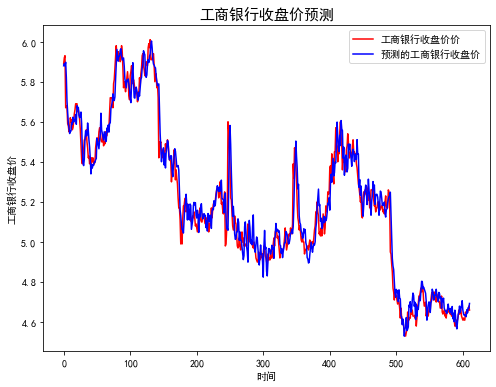

In [23]:
#画出真实数据和预测数据的对比曲线
plt.figure(figsize=(8,6))
plt.plot(real, color='red', label='工商银行收盘价价')
plt.plot(pred, color='blue', label='预测的工商银行收盘价')
plt.title('工商银行收盘价预测',fontsize=15)
plt.xlabel('时间',fontsize=10)
plt.ylabel('工商银行收盘价',fontsize=10)
plt.legend()
plt.show()

In [24]:
#均方误差
mse = mean_squared_error(pred, real)
print('均方误差: %.6f' % mse)
#均方根误差
rmse = math.sqrt(mse)
print('均方根误差: %.6f' % rmse)

均方误差: 0.005765
均方根误差: 0.075929
